In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Loading The Dataset

In [2]:
CreditCardData = pd.read_csv('../data/creditcard.csv')

In [3]:
print(CreditCardData.head())
print(CreditCardData.info())
print(CreditCardData.describe())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

### Handling the Missing Values

In [4]:
# Checking for missing values

print(CreditCardData.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
# Fill missing values (if any) with mean/median or drop rows
CreditCardData.fillna(CreditCardData.mean(), inplace=True)

### Data Cleaining

In [6]:
# Remove Duplicates
CreditCardData.drop_duplicates(inplace=True)

In [7]:
#Normalize or scale numerical features:
scaler = StandardScaler()
CreditCardData['scaled_amount'] = scaler.fit_transform(CreditCardData[['Amount']])

### Handle Class Imbalance

In [8]:
print(CreditCardData['Class'].value_counts())

0    283253
1       473
Name: Class, dtype: int64


### EXPLARATORY DATA ANALYSIS

In [9]:
# Analyze Dataset Structure
print(CreditCardData.info())
print(CreditCardData.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Time           283726 non-null  float64
 1   V1             283726 non-null  float64
 2   V2             283726 non-null  float64
 3   V3             283726 non-null  float64
 4   V4             283726 non-null  float64
 5   V5             283726 non-null  float64
 6   V6             283726 non-null  float64
 7   V7             283726 non-null  float64
 8   V8             283726 non-null  float64
 9   V9             283726 non-null  float64
 10  V10            283726 non-null  float64
 11  V11            283726 non-null  float64
 12  V12            283726 non-null  float64
 13  V13            283726 non-null  float64
 14  V14            283726 non-null  float64
 15  V15            283726 non-null  float64
 16  V16            283726 non-null  float64
 17  V17            283726 non-nul

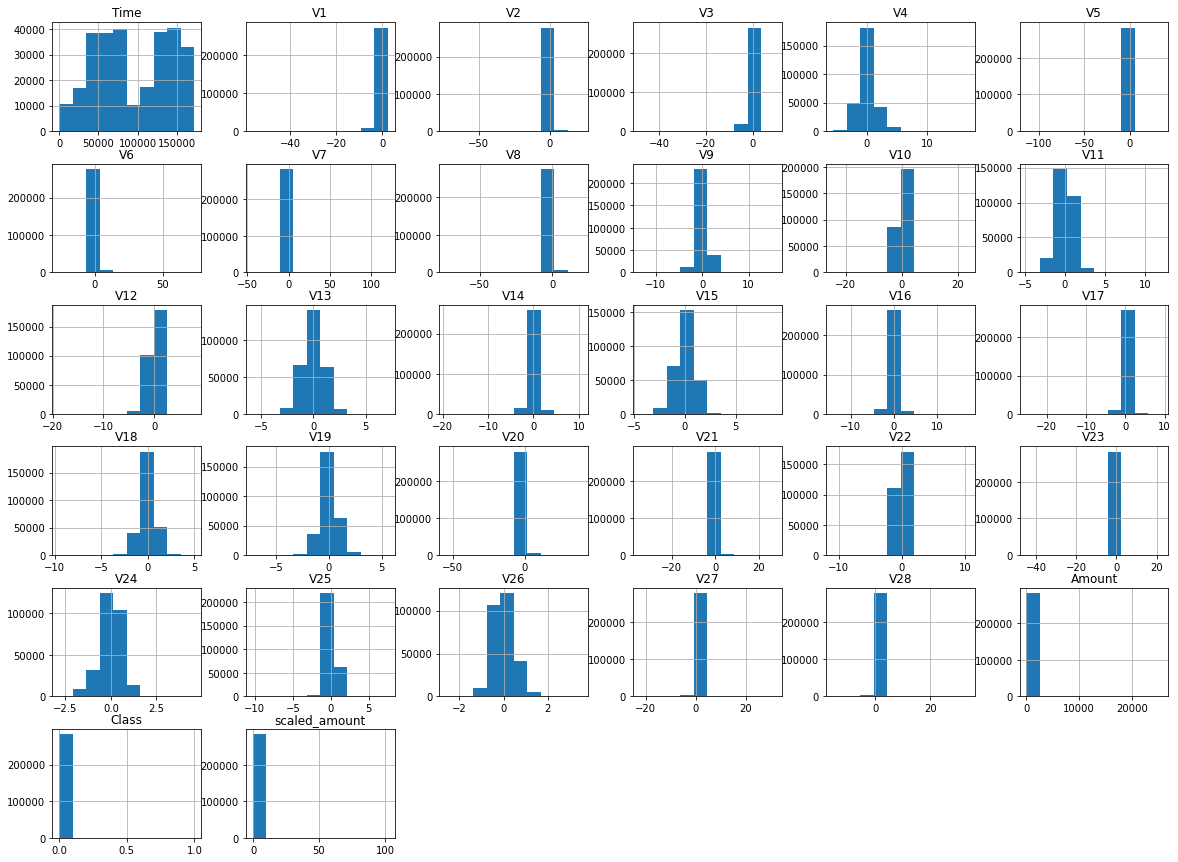

In [10]:
# Visualize Distributions of CreditCardData
CreditCardData.hist(figsize=(20,15))
plt.show()

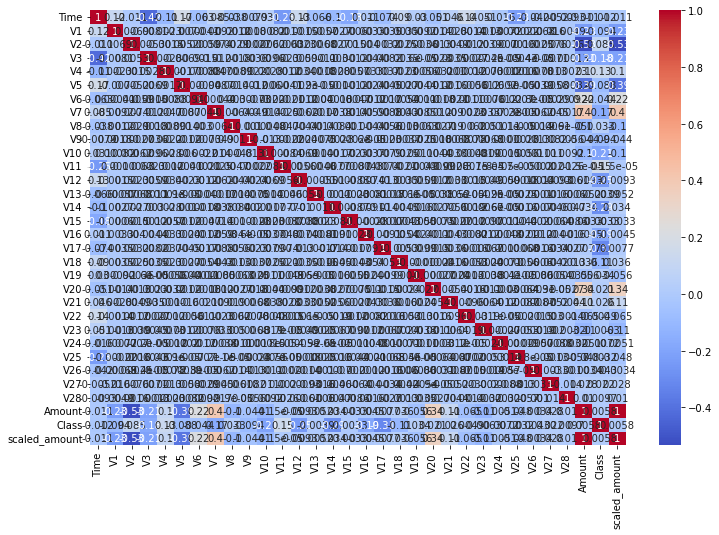

In [11]:
# Correlation Analysis
plt.figure(figsize=(12,8))
sns.heatmap(CreditCardData.corr(), annot=True, cmap='coolwarm')
plt.show()
### => NEGATIVE CORRELATION

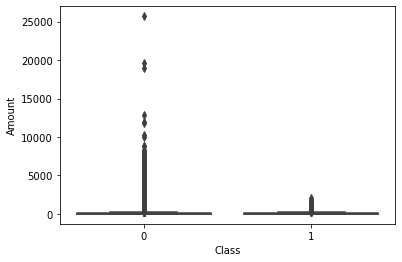

In [12]:
# Fraud vs. Non-Fraud Analysis
sns.boxplot(x='Class', y='Amount', data=CreditCardData)
plt.show()

### More Techniques to Handle Imbalance

##### RESAMPLING

1. Oversampling

In [13]:
minority_class = CreditCardData[CreditCardData['Class'] == 1]
majority_class = CreditCardData[CreditCardData['Class'] == 0]

minority_oversampled = minority_class.sample(n=len(majority_class), replace=True, random_state=42)

data_balanced = pd.concat([majority_class, minority_oversampled])

data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(data_balanced['Class'].value_counts())   

1    283253
0    283253
Name: Class, dtype: int64


2. Undersampling

In [14]:
minority_class = CreditCardData[CreditCardData['Class'] == 1]
majority_class = CreditCardData[CreditCardData['Class'] == 0]

majority_undersampled = majority_class.sample(n=len(minority_class), random_state=42)

data_balanced = pd.concat([minority_class, majority_undersampled])

data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(data_balanced['Class'].value_counts())

1    473
0    473
Name: Class, dtype: int64
